In [37]:
#import Python libraries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy.stats import binom
from scipy.stats import weibull_min

## Sampling Distribution of a Statistic

        x
0   67000
1   52000
2  100000
3   78762
4   37041
                  x
count   50000.00000
mean    68760.51844
std     32872.03537
min      4000.00000
25%     45000.00000
50%     62000.00000
75%     85000.00000
max    199000.00000


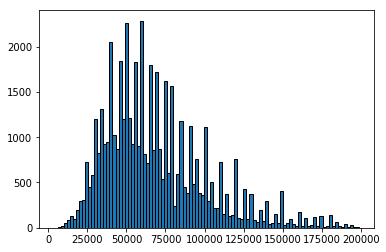

In [12]:
#download dataset into pandas dataframe
loans_income = pd.read_csv('loans_income.csv', sep=',') 

#print first five rows to see the data
print(loans_income.head())

#print descriptive statistics 
print(loans_income.describe())

#plot a histogram of all values 

plt.hist(loans_income['x'], bins=100, edgecolor='black') 
plt.show()

In [13]:
#take simple random sample of 1,000 values

sample1000 = loans_income.sample(1000)

#take random sample of 1,000 means of 5 values

mean5 = [] # Storage for means of 5 values

for i in range(1000): #repeat following procees 1000 times
    sample5 = loans_income.sample(5)  #take sample of 5 values
    mean5.append(sample5['x'].mean()) #take mean of 5 values and add it to the list 'mean5'
    
#take random sample of 1,000 means of 20 values  

mean20 = [] # Storage for means of 20 values

for i in range(1000): #repeat following procees 1000 times
    sample20 = loans_income.sample(20)  #take sample of 20 values
    mean20.append(sample20['x'].mean()) #take mean of 20 values

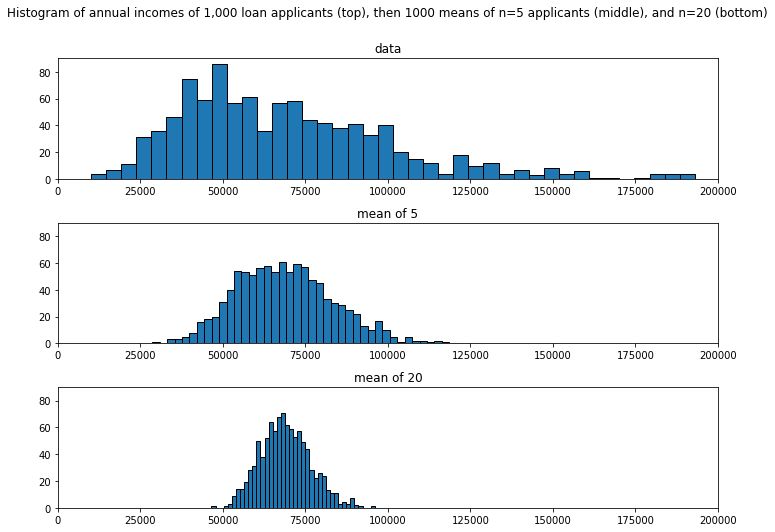

In [18]:
#use single figure with three axes     
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,7))

#plot fist histogram on the first axes
ax1.hist(sample1000['x'], bins=40, edgecolor='black') 
ax1.title.set_text('data')

#set limits for x and y axes so they will be the same for all three plots
ax1.set_xlim([0, 200000])
ax1.set_ylim([0, 90])

#plot second histogram on the second axes
ax2.hist(mean5, bins=40, edgecolor='black') 
ax2.title.set_text('mean of 5')
ax2.set_xlim([0, 200000])
ax2.set_ylim([0, 90])

#plot third histogram on the third axes
ax3.hist(mean20, bins=40, edgecolor='black') 
ax3.title.set_text('mean of 20')
ax3.set_xlim([0, 200000])
ax3.set_ylim([0, 90])

# tight_layout hepls titles do not overlap
plt.tight_layout()
plt.suptitle('Histogram of annual incomes of 1,000 loan applicants (top), then 1000 means of n=5 applicants (middle), and n=20 (bottom)', y=1.05)
plt.show()

## The Bootstrap

In [21]:
#our 'population' is stored in dataframe loans_income, our sample is sample1000
print('Population median:', loans_income['x'].median(), 'Population standart deviation:', loans_income['x'].std())

boot_median = [] # Storage for medians of bootstrap samples
boot_mean = []  # Storage for mean of bootstrap samples, since standart error of median is equal to 1.253 standart erros of the mean

for i in range(1000):
    #take random sample of size 100 with replacement
    bootsample = np.random.choice(sample1000['x'], size=100, replace=True) 
    boot_median.append(np.median(bootsample))
    boot_mean.append(np.mean(bootsample))

se_median = 1.253 * stats.sem(boot_mean)

print('Bootstrap Statistics:\nOriginal sample median', sample1000['x'].median(), 'Bootstrap median', np.median(boot_median),'Bootstrap standard error:', se_median)

Population median: 62000.0 Population standart deviation: 32872.03536985002
Bootstrap Statistics:
Original sample median 62750.0 Bootstrap median 62512.5 Bootstrap standard error: 126.17658921293221


Standart error of the median formula http://davidmlane.com/hyperstat/A106993.html
Great article on the bootstrap method https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60 and exercise on DataCamp https://campus.datacamp.com/courses/statistical-simulation-in-python/resampling-methods?ex=5

## Standard Normal and QQ-Plots

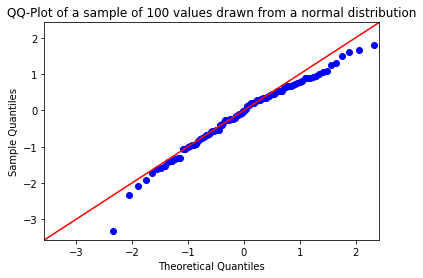

In [9]:
#take random sample from a normal distribution
normal_sample = np.random.normal(0, 1, 100)     
  
# plot a qq-plot using statsmodels.api 
sm.qqplot(normal_sample, line ='45')

plt.title('QQ-Plot of a sample of 100 values drawn from a normal distribution')
plt.show()

In [3]:
sp500 = pd.read_csv('sp500_data.csv')

nflx = sp500['NFLX'].loc[sp500['NFLX'] > 0]

nflx.count()

1613

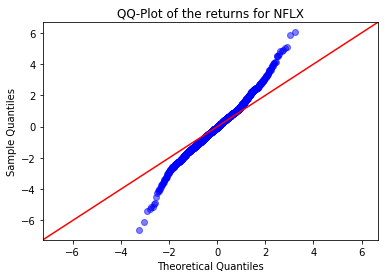

In [22]:
# plot a qq-plot using statsmodels.api with numpy equivalent of R functions diff and log
sm.qqplot(np.diff(np.log(nflx)), line ='45', alpha=0.5)

plt.title('QQ-Plot of the returns for NFLX')
plt.show()

## Binomial Distribution

In [27]:
#calculate the probability of observing exactly 2 successes (k) 
#in 5 trials (n), where the probability of success for each trial is 0.1 (p)
#using scipy
prob1 = binom.pmf(k=2, n=5, p=0.1)
print(prob1)

0.0729


In [28]:
#calculate the probability of observing 2 or fewer successes (k) 
#in 5 trials (n), where the probability of success for each trial is 0.1 (p)
prob2 = binom.cdf(k=2, n=5, p=0.1)
print(prob2)

0.99144


## Poisson and Related Distributions

In [44]:
#generate 100 random numbers from a Poisson distribution with lamda = 2 using numpy

prob3 = np.random.poisson(lam=2, size=100)
print(len(prob3))
print(prob3)

100
[1 3 3 3 3 1 1 4 0 1 3 2 5 2 4 1 3 1 1 3 2 3 2 3 2 7 2 2 2 6 0 3 2 3 3 3 2
 2 1 1 0 2 1 1 0 1 3 2 1 2 3 1 2 0 1 0 3 0 1 1 1 2 2 2 4 4 3 2 5 4 1 0 1 3
 3 3 0 2 0 0 2 3 1 2 3 3 4 2 3 0 2 3 0 1 5 1 0 5 2 0]


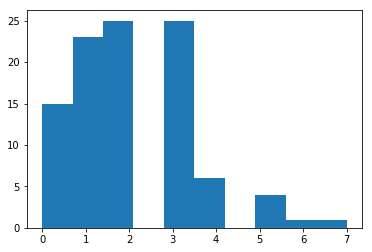

In [45]:
plt.hist(prob3)
plt.show()

In [48]:
#generate 100 random numbers from an exponential distribution where the mean number of events per time period is 2
prob4 = np.random.exponential(scale=0.2, size=100)
print(len(prob4))
print(prob4)

100
[0.16813831 0.18133875 0.09001448 0.06507779 0.51598123 0.03934345
 0.34279564 0.33182444 0.20179719 0.09415333 0.10268199 0.02661165
 0.24357875 0.16191899 0.21021989 0.42923788 0.156166   0.62664693
 0.29162985 0.01438571 0.05817438 0.47798594 0.07177416 1.01097393
 0.0810168  0.10452685 0.04305345 0.02544209 0.15811791 0.18558942
 0.23479722 0.40580547 0.01084306 0.40730051 0.07902314 0.03337456
 0.45357356 0.18967277 0.33629826 0.43915868 0.25270069 0.27669174
 0.0097889  0.09672063 0.91920733 0.16582186 0.00133396 0.20134854
 0.49310106 0.01506023 0.30926793 0.08974819 0.19429139 0.13775983
 0.98472838 0.219345   0.34441994 0.10207534 0.14990095 0.05039634
 0.26554997 0.21691908 0.08423973 0.07446281 0.03441139 0.01330927
 0.14239327 0.37730547 0.24949719 0.18318814 0.53471782 0.11997951
 0.33564514 0.05782468 0.02493362 0.12219657 0.0759586  0.01954081
 0.16984398 0.57678243 0.02445227 0.36004321 0.07069407 0.11025286
 0.02089813 0.27272886 0.03867931 0.16524387 0.43466861 0.

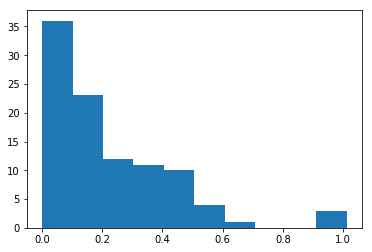

In [49]:
plt.hist(prob4)
plt.show()

In [42]:
#generate 100 random numbers (lifetimes) from a Weibull distribution 
#with shape of 1.5 and characteristic life of 5,000

prob5 = weibull_min.rvs(1.5, loc=0, scale=5000, size=100)
print(len(prob5))
print(prob5)

100
[ 3631.49050485   249.42882253  3455.67977888  6048.33710162
   460.15912617  4802.80976346  4509.45969821  1808.01248436
  2137.50079129  3553.8017219   7165.91020369   820.69196428
  3679.21573076  1485.33096802  2609.5290457   3043.90630522
  9144.59514388  3231.32225507  4861.13777928   975.54723762
   113.76768385  2087.36321227  2607.61010039  4692.26229348
  8694.25526717  4988.04258809  1548.66858248  4499.39531152
  4374.0428003   1886.071957    1758.7369747   1938.40087034
  8040.96409304  5380.04282817  4271.35253171 10379.64475048
 11809.83896328  4637.79062438  5595.67928563  1216.86143729
  3588.77164531  1073.43466591  4479.07712204  3120.03326934
  5246.53539687  5326.19421016  2893.50373445   875.75267015
  5486.30925965  3361.02748598  1680.66821957   788.30182673
  1668.09637648  9133.53733489  8019.44536438  1325.28942089
  4758.89078291  2410.27380188  2921.37065486  1871.10307414
  4405.56728612  4708.82351321  5752.64664256  4250.78813199
  2622.51630406  518

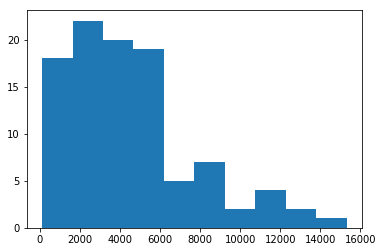

In [50]:
plt.hist(prob5)
plt.show()